<a href="https://colab.research.google.com/github/rajibmondal/Projects.NLP/blob/master/NLP_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
from fastai.text import *
from fastai import *
bs = 128

In [3]:
data_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets'

path = Path(data_dir)

df = pd.read_csv(path/'clean_train.csv')
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb')]

In [0]:
# data_lm = (TextList.from_csv(path,'clean_train.csv')
#            #Inputs: all the text files in path
#             .filter_by_csv(include=['clean_train.csv']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data1_lm.pkl')

In [0]:
# data_lm = (TextList.from_folder(path).filter_by_folder(include=['train','test'])
# .split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=bs, num_workers=1))

In [21]:
data = (TextList
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct()
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [22]:
data.show_batch()

idx,text
0,# xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos i 'm on top of the hill and i can see a fire in the xxunk ... xxbos xxmaj there 's an emergency evacuation happening now in the
1,. ' - xxmaj joel xxmaj brown xxbos xxmaj xxunk xxmaj god that we have xxunk that tells it like it is ! ! ! # now # xxunk # xxunk https : / / t.co / xxunk xxbos ' xxmaj remembering that you are going to die is the best way i know to avoid the trap of thinking you have something to lose . ' xxup ûò xxmaj
2,/ t.co / xxunk via @change xxbos xxmaj the annihilation of xxmaj jeb xxmaj xxunk & & xxmaj xxunk is less than 24 hours away .. \n xxmaj please xxmaj god allow me at least one more full day ... xxbos xxunk xxmaj we need help ! xxmaj horses will xxunk xxup rt & & sign xxunk a stand & & be a voice for them ! # xxunk
3,q2eblokeve xxmaj fan xxmaj army # xxmaj directioners http : / / t.co / encmhz6y34 xxunk xxbos xxup xxunk xxup xxunk xxup army xxup date xxup women xxup 's xxup rubber xxup xxunk xxup watch xxunk http : / / t.co / xxunk http : / / t.co / xxunk xxbos . : . : . : . : . : . : . : . : . : .
4,why are black men getting attacked https : / / t.co / xxunk xxbos xxmaj israeli xxunk that attacked civilians in xxmaj gaza just xxunk xxunk in xxmaj greece . xxbos xxmaj christian xxmaj attacked by xxmaj muslims at the xxmaj temple xxmaj mount after xxmaj waving xxmaj israeli xxmaj flag via xxmaj pamela xxmaj geller - ... http : / / t.co / xxunk xxbos xxmaj christian xxmaj attacked


In [0]:
data.save('data1_lm.pkl')

In [24]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data1_lm.pkl')]

In [0]:
data_lm = load_data(path, 'data1_lm.pkl', bs=bs)

In [26]:
data_lm.show_batch()

idx,text
0,# xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos i 'm on top of the hill and i can see a fire in the xxunk ... xxbos xxmaj there 's an emergency evacuation happening now in the
1,sleeping xxunk double your risk of a car accident http : / / t.co / xxunk xxbos ' xxmaj by accident ' they knew what was gon happen https : / / t.co / xxunk xxbos xxup i-77 xxmaj mile xxmaj xxunk 31 to 40 xxmaj south xxmaj xxunk xxmaj xxunk xxmaj vehicle xxmaj accident xxmaj xxunk at 8 / 6 xxunk xxup pm xxbos the xxunk was not in
2,. ' - xxmaj joel xxmaj brown xxbos xxmaj xxunk xxmaj god that we have xxunk that tells it like it is ! ! ! # now # xxunk # xxunk https : / / t.co / xxunk xxbos ' xxmaj remembering that you are going to die is the best way i know to avoid the trap of thinking you have something to lose . ' xxup ûò xxmaj
3,this dog thinks he 's an ambulance xxrep 6 ? http : / / t.co / xxunk xxbos xxup happening xxup now - xxup xxunk xxup ems xxup ambulance xxup xxunk xxup with xxup dual xxup sirens xxup xxunk _ https : / / t.co / xxunk xxbos http : / / t.co / xxunk xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / /
4,/ t.co / xxunk via @change xxbos xxmaj the annihilation of xxmaj jeb xxmaj xxunk & & xxmaj xxunk is less than 24 hours away .. \n xxmaj please xxmaj god allow me at least one more full day ... xxbos xxunk xxmaj we need help ! xxmaj horses will xxunk xxup rt & & sign xxunk a stand & & be a voice for them ! # xxunk


In [27]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


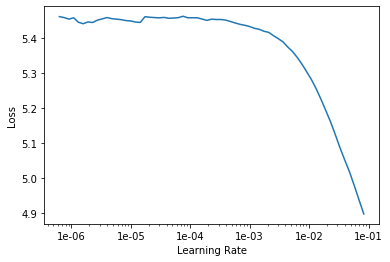

In [30]:
learn.recorder.plot(skip_end=25)

In [31]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.637442,3.908850,0.357857,00:05


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.828700,3.516599,0.403013,00:07
1,3.611425,3.409459,0.408661,00:08
2,3.414736,3.094651,0.452187,00:08
3,3.206931,2.977656,0.470737,00:08
4,3.036209,2.938262,0.475246,00:08
5,2.848934,2.898179,0.481942,00:08
6,2.677482,2.901782,0.484554,00:07
7,2.516959,2.903871,0.489286,00:07
8,2.388695,2.910753,0.487254,00:07
9,2.293808,2.914146,0.487098,00:07


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "there is fire"
N_WORDS = 40
N_SENTENCES = 2

In [41]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

there is fire in my house on i damaged my bathroom xxbos RT ' MH370 : Aircraft debris found on La Reunion may be from missing Malaysia Airlines ... - ABC News ... http
there is fire in the industry now xxbos Hot Christian Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http : / /


In [0]:
learn.save_encoder('fine_tuned_enc')

In [43]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/lm_databunch'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/tmp_lm'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data1_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models')]

In [44]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

IndexError: ignored

In [0]:
len(data.vocab.itos), len(data.train_ds)

(3928, 6091)

In [0]:
data.save('lm_databunch')

In [0]:
data = load_data(path, 'lm_databunch', bs=bs)

In [0]:
learn = language_model_learner(data, AWD_LSTM,drop_mult=1.).to_fp16()

AttributeError: ignored

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline